In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import sqrt


In [3]:
rim_width = 1.2192 #4ft
rim_height = 2.64
cargo_radius = 0.2413/2

def flight_model(t, s):
    x, vx, y, vy = s
    dx = vx
    dvx = 0
    dy = vy
    dvy = -9.8
    return [dx, dvx, dy, dvy]

def hit_ground(t, s):
    x, vx, y, vy = s
    return y
hit_ground.terminal = True

def hit_rim(t, s):
    x, vx, y, vy = s
    dist_to_rim = min(x - -rim_width/2, -(y - rim_height)) #positive if cargo is down and to the right of closest rim
    return dist_to_rim + cargo_radius
hit_rim.terminal = True

def passed_rim(t, s):
    x, vx, y, vy = s
    return x - rim_width/2
passed_rim.terminal = True

undershot


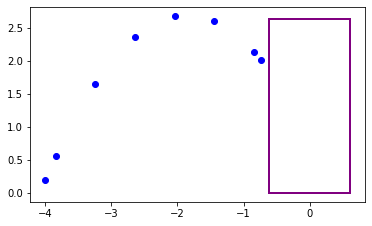

result: -1


In [4]:
def try_shot(s0, doShow):
    t_span = (0, 5.0)
    solution = solve_ivp(flight_model, t_span, s0, events=[hit_ground, hit_rim, passed_rim], max_step=0.2)

    result = 0 #default is success
    if(solution.y[0][-1] < -rim_width/2):
        result = -1 #undershot
    elif(solution.y[0][-1] > rim_width/2 - cargo_radius):
        result = 1 #overshot

    if doShow:

        if result == -1: print("undershot")
        elif result == 0: print("success")
        elif result == 1: print("overshot")

        plt.plot(solution.y[0, :], solution.y[2, :], 'bo')

        left, bottom, width, height = (-rim_width/2, 0, rim_width, rim_height)
        rect=mpatches.Rectangle((left,bottom), width, height, fill=False, color="purple", linewidth=2)
        plt.gca().add_patch(rect)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

    return result

#s0 is [xpos, xvel, ypos, yvel]
print("result:", try_shot(s0=[-4, 3, 0.2, 7], doShow=True))


In [5]:
from math import pi
x_range = np.arange(-6, -1, 0.1)
y_range = np.arange(0.2, 1.4, 0.1)

ang_range = np.linspace(0, pi, num=10)
speed_range = np.linspace(7, 15, num=10)

everything = np.zeros((x_range.size, y_range.size, ang_range.size, speed_range.size))
print("everything shape", everything.shape)
print("everything cells", everything.size)

heatmap = np.zeros((x_range.size, y_range.size, 3))
vel_combos = ang_range.size * speed_range.size
print("vel combos", vel_combos)

everything shape (50, 12, 10, 10)
everything cells 60000
vel combos 100


In [6]:
from math import sin, cos

for xi in range(x_range.size):
    for yi in range(y_range.size):

        num_zeros = 0

        for angi in range(ang_range.size):
            for speedi in range(speed_range.size):

                vx = speed_range[speedi] * cos(ang_range[angi])
                vy = speed_range[speedi] * sin(ang_range[angi])

                cell = try_shot(s0=[x_range[xi], vx, y_range[yi], vy], doShow=False)
                everything[xi][yi][angi][speedi] = cell
                if cell == 0:
                    num_zeros += 1

        heatmap[xi, yi, 0] = num_zeros / vel_combos #overall probability of hitting target 


    print(f'x pos index {xi} of {x_range.size}')

print("done")

x pos index 0 of 50
x pos index 1 of 50
x pos index 2 of 50
x pos index 3 of 50
x pos index 4 of 50
x pos index 5 of 50
x pos index 6 of 50
x pos index 7 of 50
x pos index 8 of 50
x pos index 9 of 50
x pos index 10 of 50
x pos index 11 of 50
x pos index 12 of 50
x pos index 13 of 50
x pos index 14 of 50
x pos index 15 of 50
x pos index 16 of 50
x pos index 17 of 50
x pos index 18 of 50
x pos index 19 of 50
x pos index 20 of 50
x pos index 21 of 50
x pos index 22 of 50
x pos index 23 of 50
x pos index 24 of 50
x pos index 25 of 50
x pos index 26 of 50
x pos index 27 of 50
x pos index 28 of 50
x pos index 29 of 50
x pos index 30 of 50
x pos index 31 of 50
x pos index 32 of 50
x pos index 33 of 50
x pos index 34 of 50
x pos index 35 of 50
x pos index 36 of 50
x pos index 37 of 50
x pos index 38 of 50
x pos index 39 of 50
x pos index 40 of 50
x pos index 41 of 50
x pos index 42 of 50
x pos index 43 of 50
x pos index 44 of 50
x pos index 45 of 50
x pos index 46 of 50
x pos index 47 of 50
x 

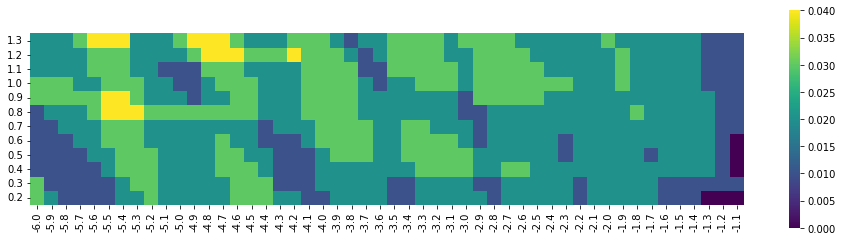

In [7]:
import seaborn as sns

overall_prob = heatmap[:, :, 0]
overall_prob = np.swapaxes(overall_prob, 0, 1)

xlabels = np.round(x_range, 2)
ylabels = np.round(y_range, 2)

plt.figure(figsize = (16, 4))

ax = sns.heatmap(overall_prob, xticklabels=xlabels, yticklabels=ylabels, cmap='viridis', square=True)
ax.invert_yaxis()


# left, bottom, width, height = (-rim_width/2, 0, rim_width, rim_height)

# ax.add_patch(mpatches.Rectangle((left, bottom), width, height, edgecolor='red', fill=False, lw=1))


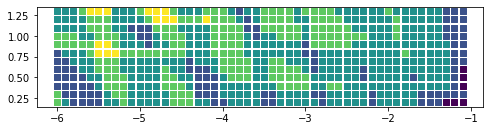

In [8]:
plt.figure(figsize = (8, 8))
X, Y = np.meshgrid(xlabels, ylabels)
plt.scatter(X, Y, c=overall_prob, marker='s')
plt.gca().set_aspect('equal', adjustable='box')


success


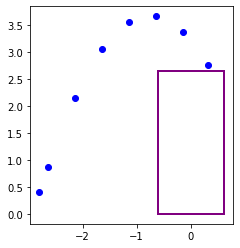

0

In [9]:
try_shot(s0=[-2.8, 2.5, 0.4, 8], doShow=1)

In [10]:
def refine_ang_speed_space(x, y, ang_range_dense, speed_range_dense):

    # ang_range_dense = np.linspace(min(ang_range), max(ang_range), ang_divs)
    # speed_range_dense = np.linspace(min(speed_range), max(speed_range), speed_divs)
    
    ang_speed_space = np.zeros((ang_range_dense.size, speed_range_dense.size))

    num_zeros = 0

    for angi in range(ang_range_dense.size):
        for speedi in range(speed_range_dense.size):

            vx = speed_range_dense[speedi] * cos(ang_range_dense[angi])
            vy = speed_range_dense[speedi] * sin(ang_range_dense[angi])

            cell = try_shot(s0=[x, vx, y, vy], doShow=False)

            if cell == 0: num_zeros += 1

            ang_speed_space[angi][speedi] = cell

    print("at x", x, "and y", y, "gets", num_zeros, "hits")
    # print(ang_speed_space)

    plt.figure(figsize = (8, 8))
    X, Y = np.meshgrid(ang_range_dense, speed_range_dense)
    plt.scatter(X, Y, c=ang_speed_space.T, marker='s')
    plt.xlabel("angle")
    plt.ylabel("speed")
    plt.show()



at x -4.9 and y 1.1 gets 231 hits


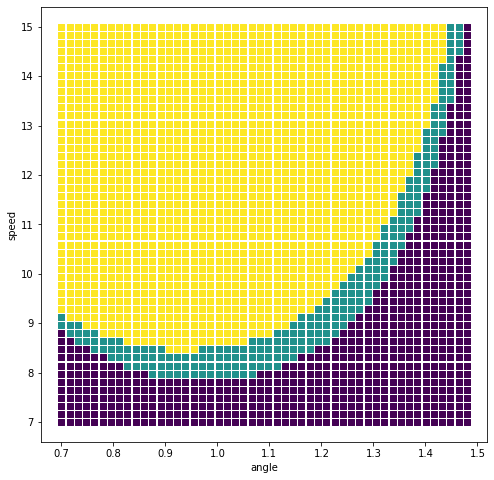

at x -4.8 and y 1.2 gets 244 hits


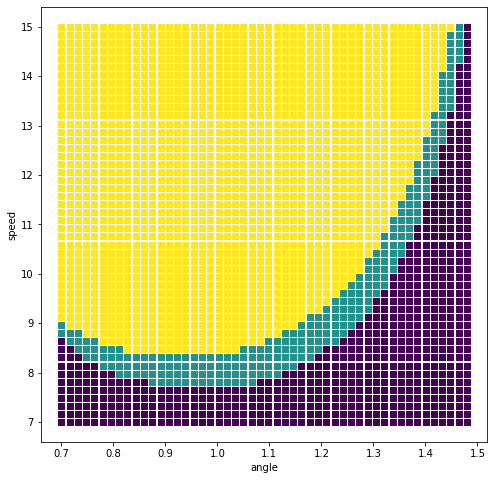

at x -3.2 and y 0.5 gets 193 hits


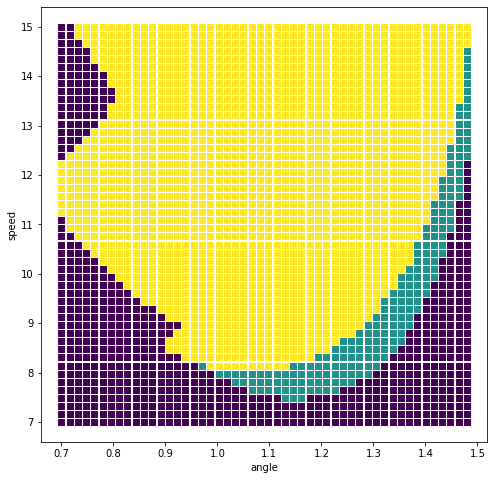

In [14]:
refine_ang_speed_space(-4.9, 1.1, ang_range_dense=np.linspace(0.7, 1.48, 50), speed_range_dense=np.linspace(7, 15, 50))
refine_ang_speed_space(-4.8, 1.2, ang_range_dense=np.linspace(0.7, 1.48, 50), speed_range_dense=np.linspace(7, 15, 50))
refine_ang_speed_space(-3.2, 0.5, ang_range_dense=np.linspace(0.7, 1.48, 50), speed_range_dense=np.linspace(7, 15, 50))

at x -6 and y 0.4 gets 142 hits


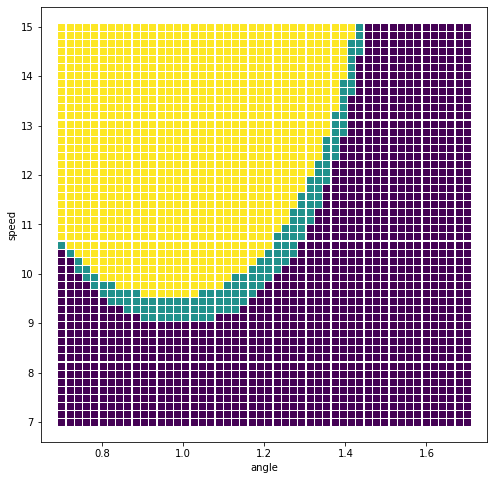

at x -6 and y 0.2 gets 136 hits


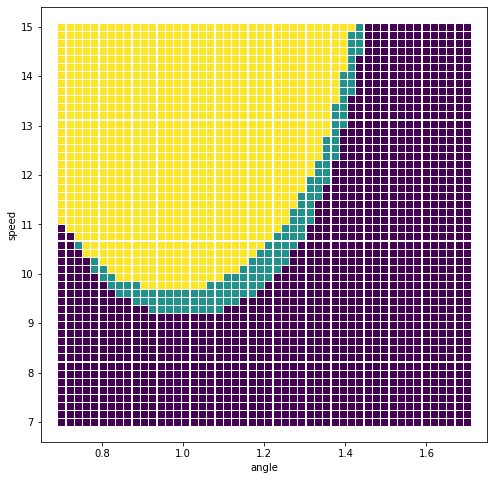

In [12]:
refine_ang_speed_space(-6, 0.4, ang_range_dense=np.linspace(0.7, 1.7, 50), speed_range_dense=np.linspace(7, 15, 50))
refine_ang_speed_space(-6, 0.2, ang_range_dense=np.linspace(0.7, 1.7, 50), speed_range_dense=np.linspace(7, 15, 50))

success


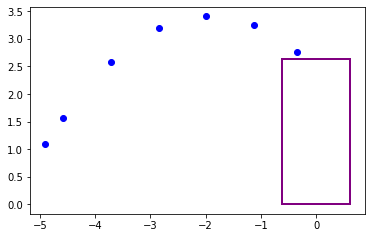

0

In [13]:
speed = 8
angle = 1.0
try_shot(s0=[-4.9, speed*cos(angle), 1.1, speed*sin(angle)], doShow=True)

speed as a predicted function of angle matches simulation pretty well:
https://www.desmos.com/calculator/yjkeyjtnlf
![speed as a predicted function of angle matches simulation pretty well](desmos.png)
